# House Prices Dataset - Exploratory Data Analysis
In this notebook, we will perform an enhanced exploratory data analysis (EDA) on the House Prices dataset. The analysis will include data loading, cleaning, preprocessing, and feature engineering, accompanied by visualizations to illustrate our findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load the dataset
df_test = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_train = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

# Concatenate the datasets vertically, I don't want to have to apply all my transformations twice
df = pd.concat([df_test, df_train], axis=0, ignore_index=True)
df.set_index("Id", inplace=True)

In [3]:
# Display the first five rows
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal   208500.0  
2        0      5    2007        WD         Normal   181500.0  
3        0      9    2008        WD         Normal   223500.0  
4        0      2    2006        WD        Abnorml   140000.0  
5        0     12    2008        WD         Normal   250000.0  

[5 rows x 80 columns]

In [4]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [5]:
# Statistical summary of numerical features
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000   
mean     57.137718    69.305795   10168.114080     6.089072     5.564577   
std      42.517628    23.344905    7886.996359     1.409947     1.113131   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7478.000000     5.000000     5.000000   
50%      50.000000    68.000000    9453.000000     6.000000     5.000000   
75%      70.000000    80.000000   11570.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000  ...   
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248  ...   
std      30.291442     20.894344   179.334253   455.610826   169.205611  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000  ...   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000   
mean     93.709832    47.486811      23.098321     2.602261    16.062350   
std     126.526589    67.575493      64.244246    25.188169    56.184365   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    26.000000       0.000000     0.000000     0.000000   
75%     168.000000    70.000000       0.000000     0.000000     0.000000   
max    1424.000000   742.000000    1012.000000   508.000000   576.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  2919.000000   2919.000000  2919.000000  2919.000000    1460.000000  
mean      2.251799     50.825968     6.213087  2007.792737  180921.195890  
std      35.663946    567.402211     2.714762     1.314964   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     4.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     800.000000  17000.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [6]:
# List of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [7]:
# List of categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In the above, we imported the necessary libraries and loaded the dataset into a Pandas DataFrame. We displayed the first few rows to get an initial understanding of the data. Using df.info() and df.describe(), we obtained summaries of the dataset, which help identify data types and basic statistical properties. We also separated the features into numerical and categorical for targeted analysis.

## Dealing with Missing Values

In [8]:
# Total missing values per feature
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values


Electrical         1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
BsmtFinSF2         1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
MasVnrType      1766
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

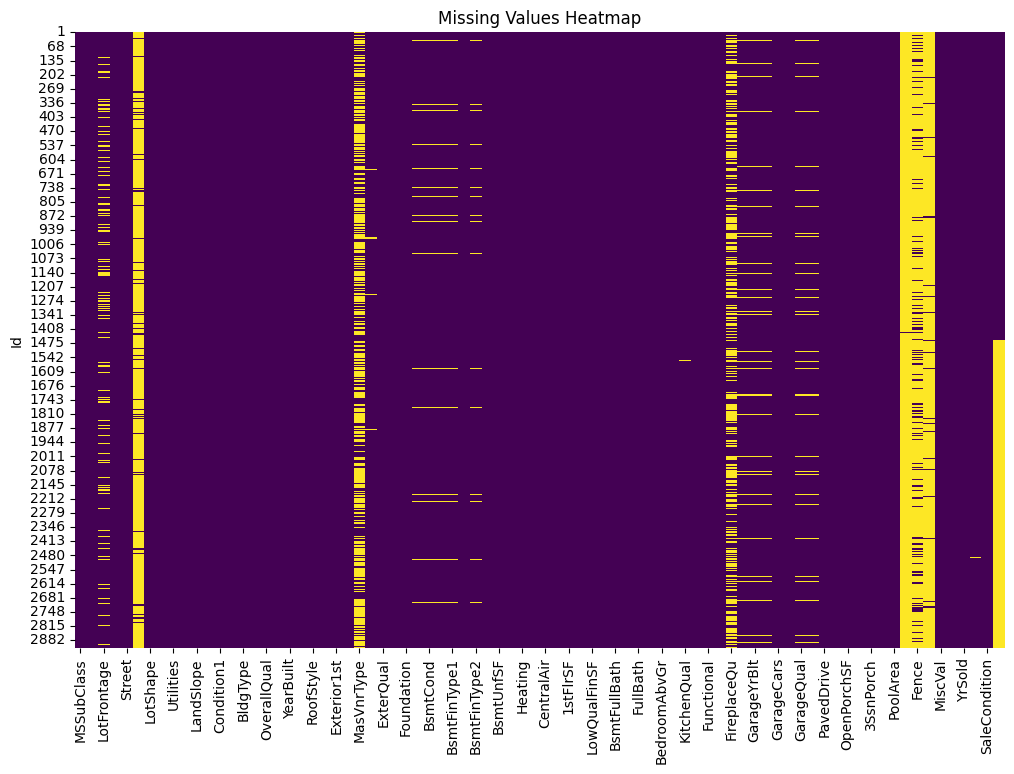

In [9]:
# Visualizing missing data with a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# Impute or drop missing values based on feature characteristics
# For numerical features, we can use median imputation
num_with_nan = [feature for feature in numerical_features if df[feature].isnull().sum() > 0]
for feature in num_with_nan:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

# For categorical features, we can use mode imputation
cat_with_nan = [feature for feature in categorical_features if df[feature].isnull().sum() > 0]
for feature in cat_with_nan:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

/var/folders/7v/3br959qn2kv_g8t6w_nhm7qh0000gn/T/ipykernel_39569/912646591.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(median_value, inplace=True)
/var/folders/7v/3br959qn2kv_g8t6w_nhm7qh0000gn/T/ipykernel_39569/912646591.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

We identified features with missing values and visualized them using a heatmap. For numerical features with missing values, we used median imputation to fill in the missing data. For categorical features, mode imputation was applied. These methods help in retaining the dataset's integrity without losing valuable information. We can clearly see that some features are very sparse and will probably not help us much in our further analysis

## Exploratory Data Analysis

# Histograms for numerical features

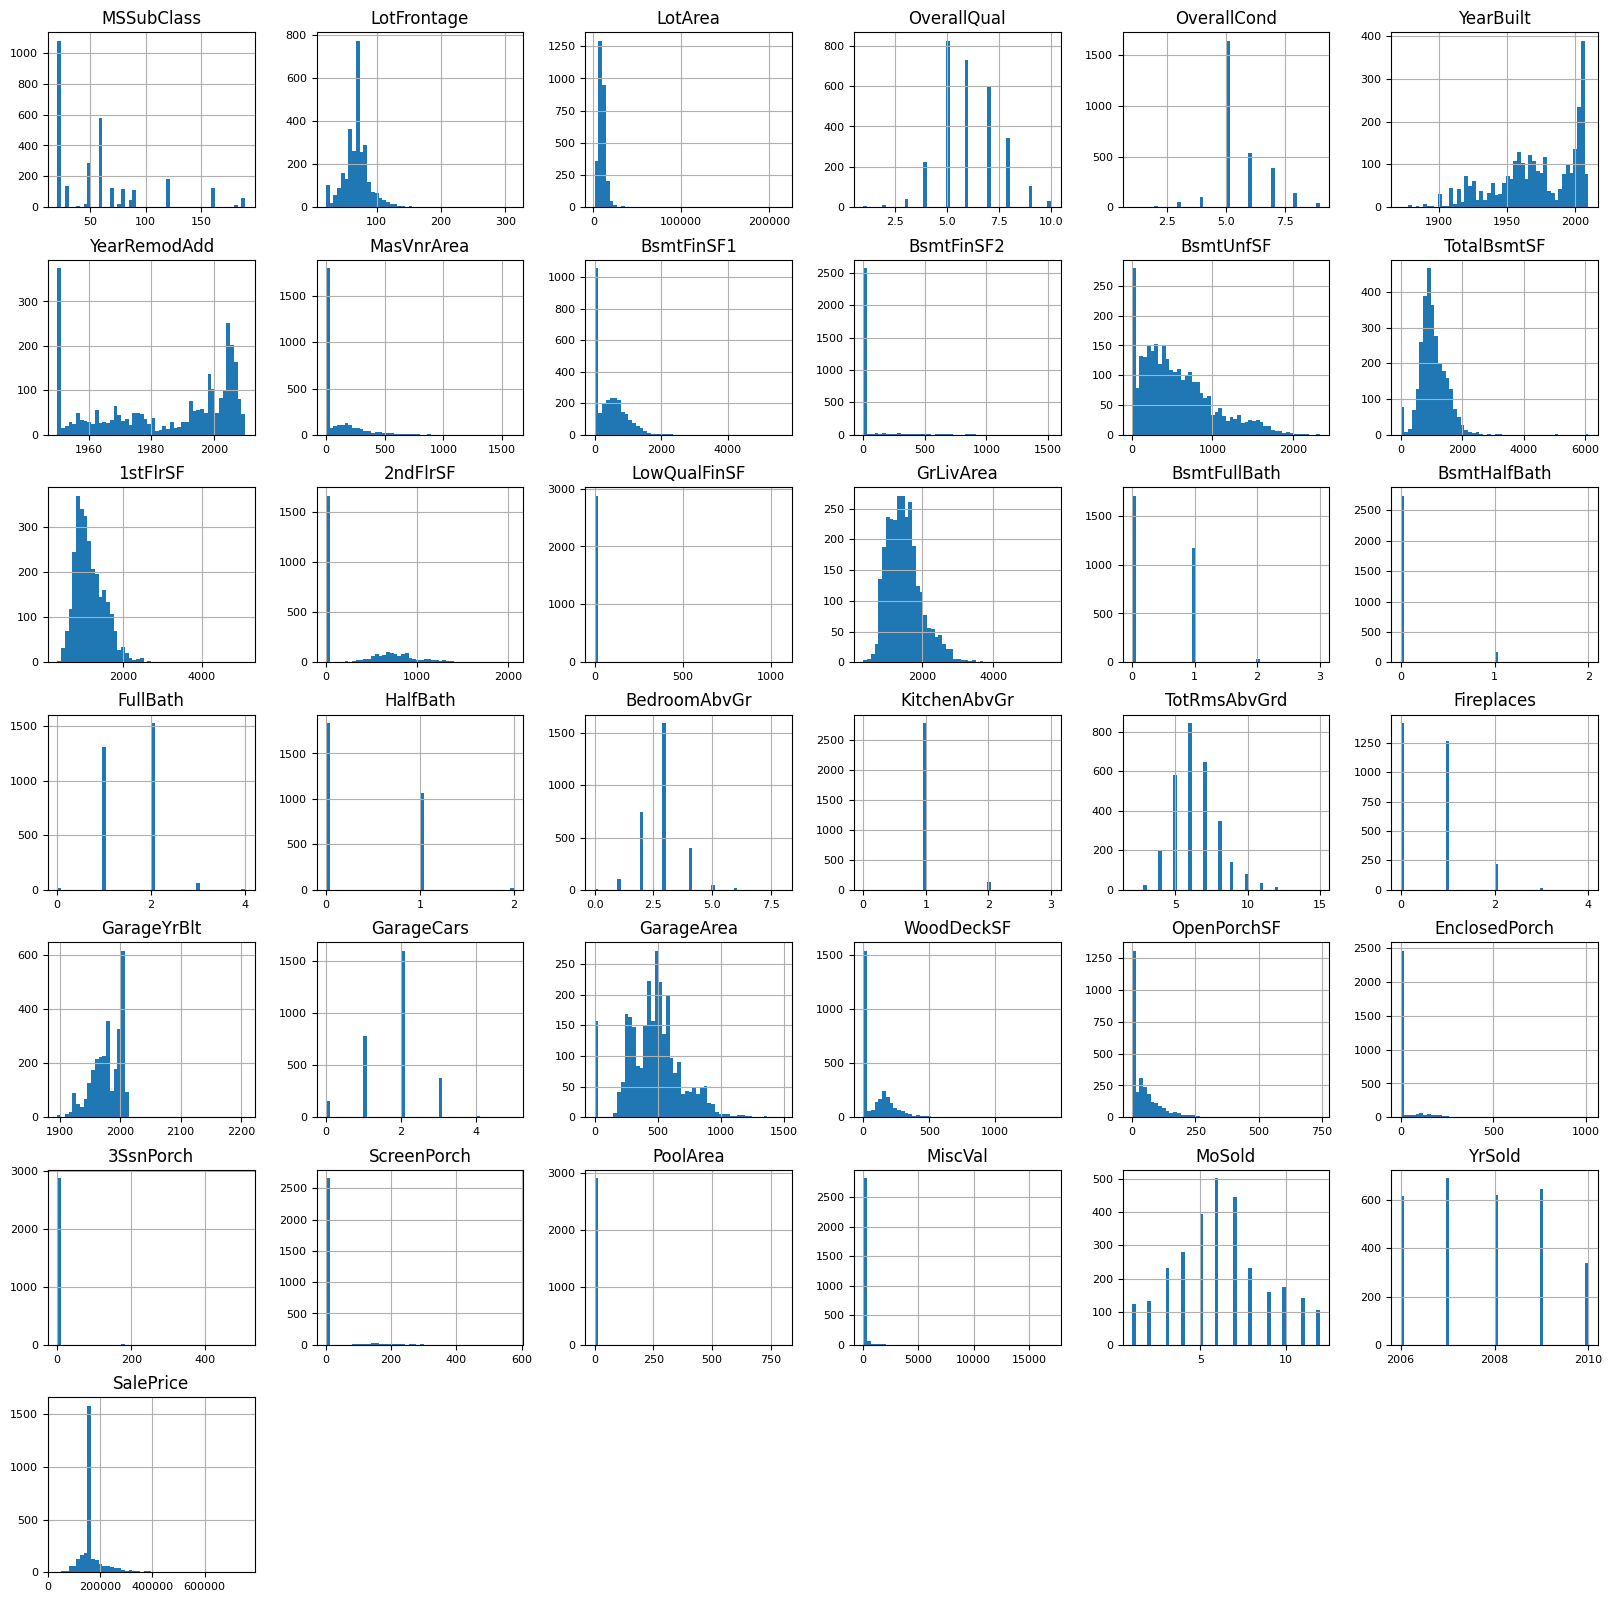

In [11]:
df[numerical_features].hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

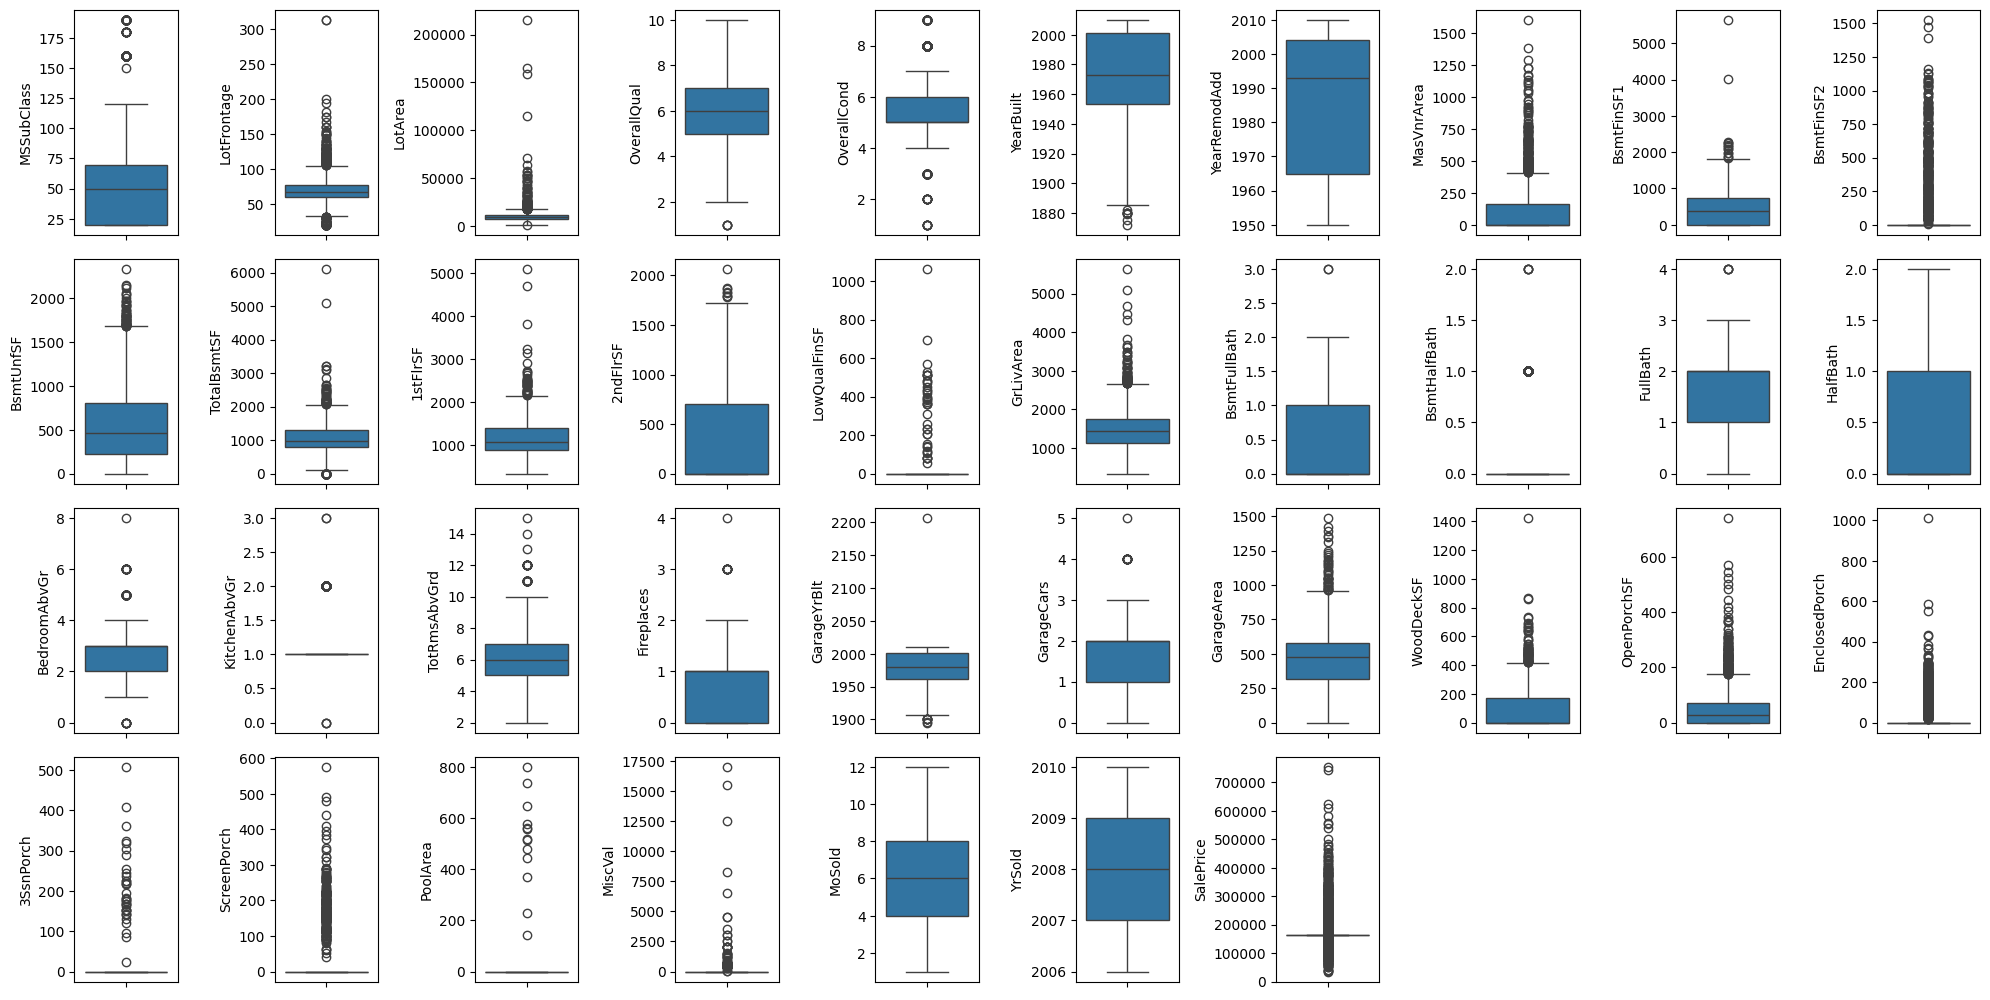

In [12]:
# Box plots to check for outliers
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(6, 10, i+1)
    sns.boxplot(y=feature, data=df)
    plt.tight_layout()


Several features, such as LotFrontage, LotArea, MasVnrArea, and GrLivArea, show significant outliers, indicated by points outside the whiskers.
Features like GarageYrBlt, PoolArea, and MiscVal also exhibit notable outliers, something we will need to consider when construction our prediction model.

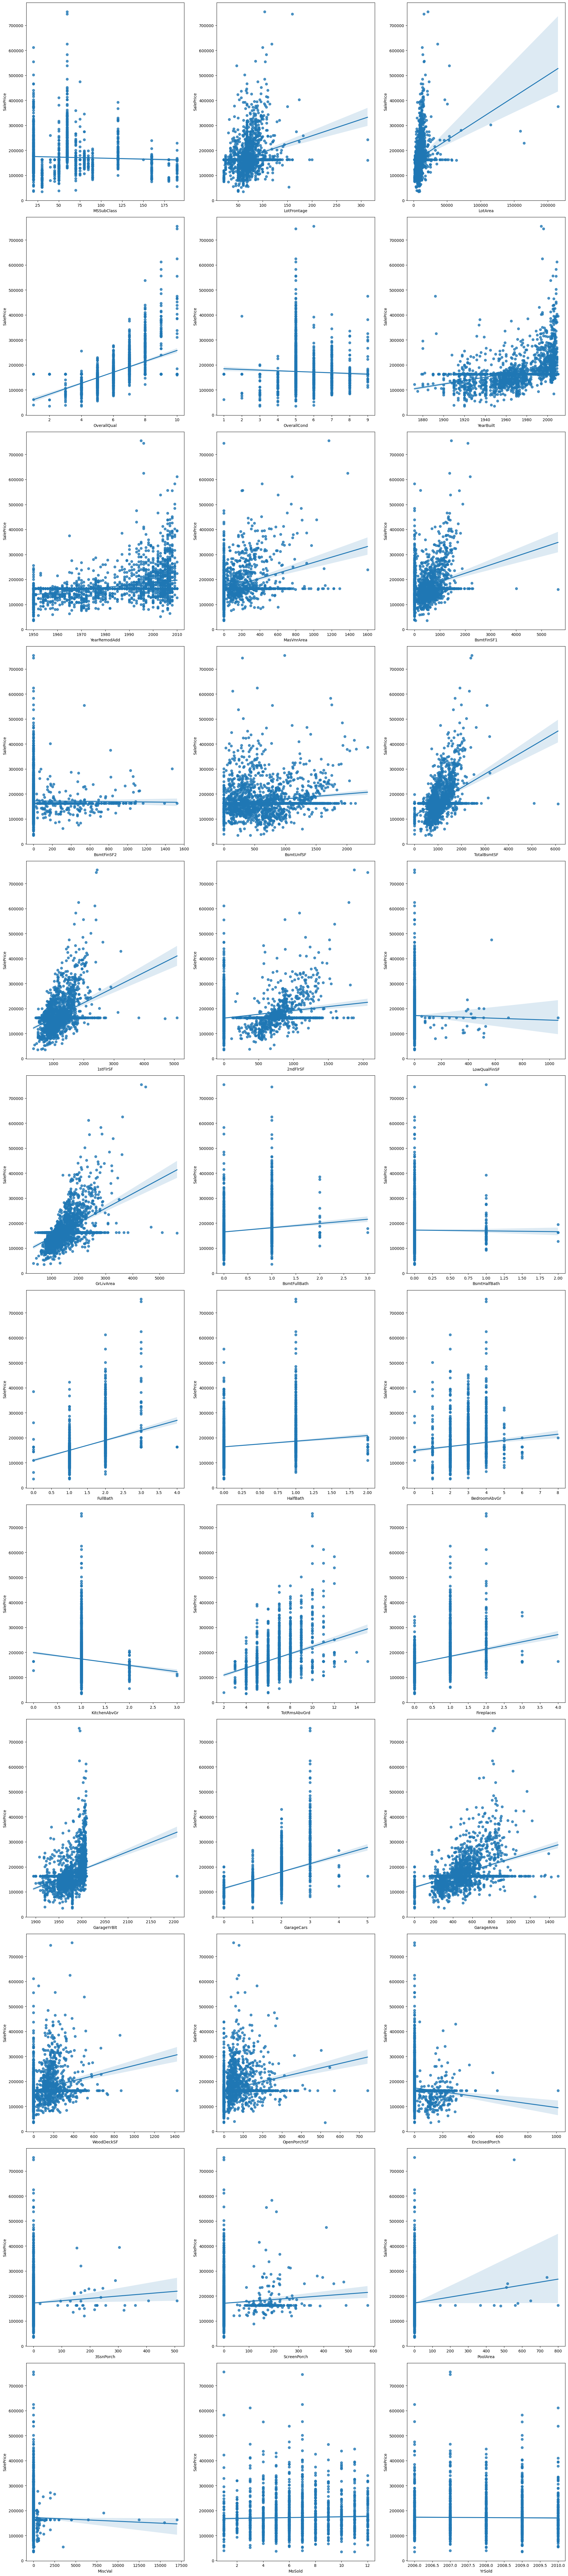

In [13]:
# Scatter plots of numerical features against SalePrice
# for feature in numerical_features:

#         plt.figure(figsize=(5, 4))
#         sns.scatterplot(x=feature, y='SalePrice', data=df)
#         plt.title(f'SalePrice vs {feature}')
#         plt.show()
plt.figure(figsize=(20, 150))
for i, feature in enumerate(numerical_features):
    if feature != 'SalePrice' and feature != 'Id':
        plt.subplot(20,3 , i+1)
        sns.regplot(x=feature,y='SalePrice', data=df)
        plt.tight_layout()


Thanks to seaborn's awesome regplots, we can see some highly variables highly correlated with saleprice, like year built and first floor square footage. Something to be aware of for later is that things like year built and garage year built are likely highly correlated so we may want to disregard one of these later.

Lets inspect these in a correlation matrix:

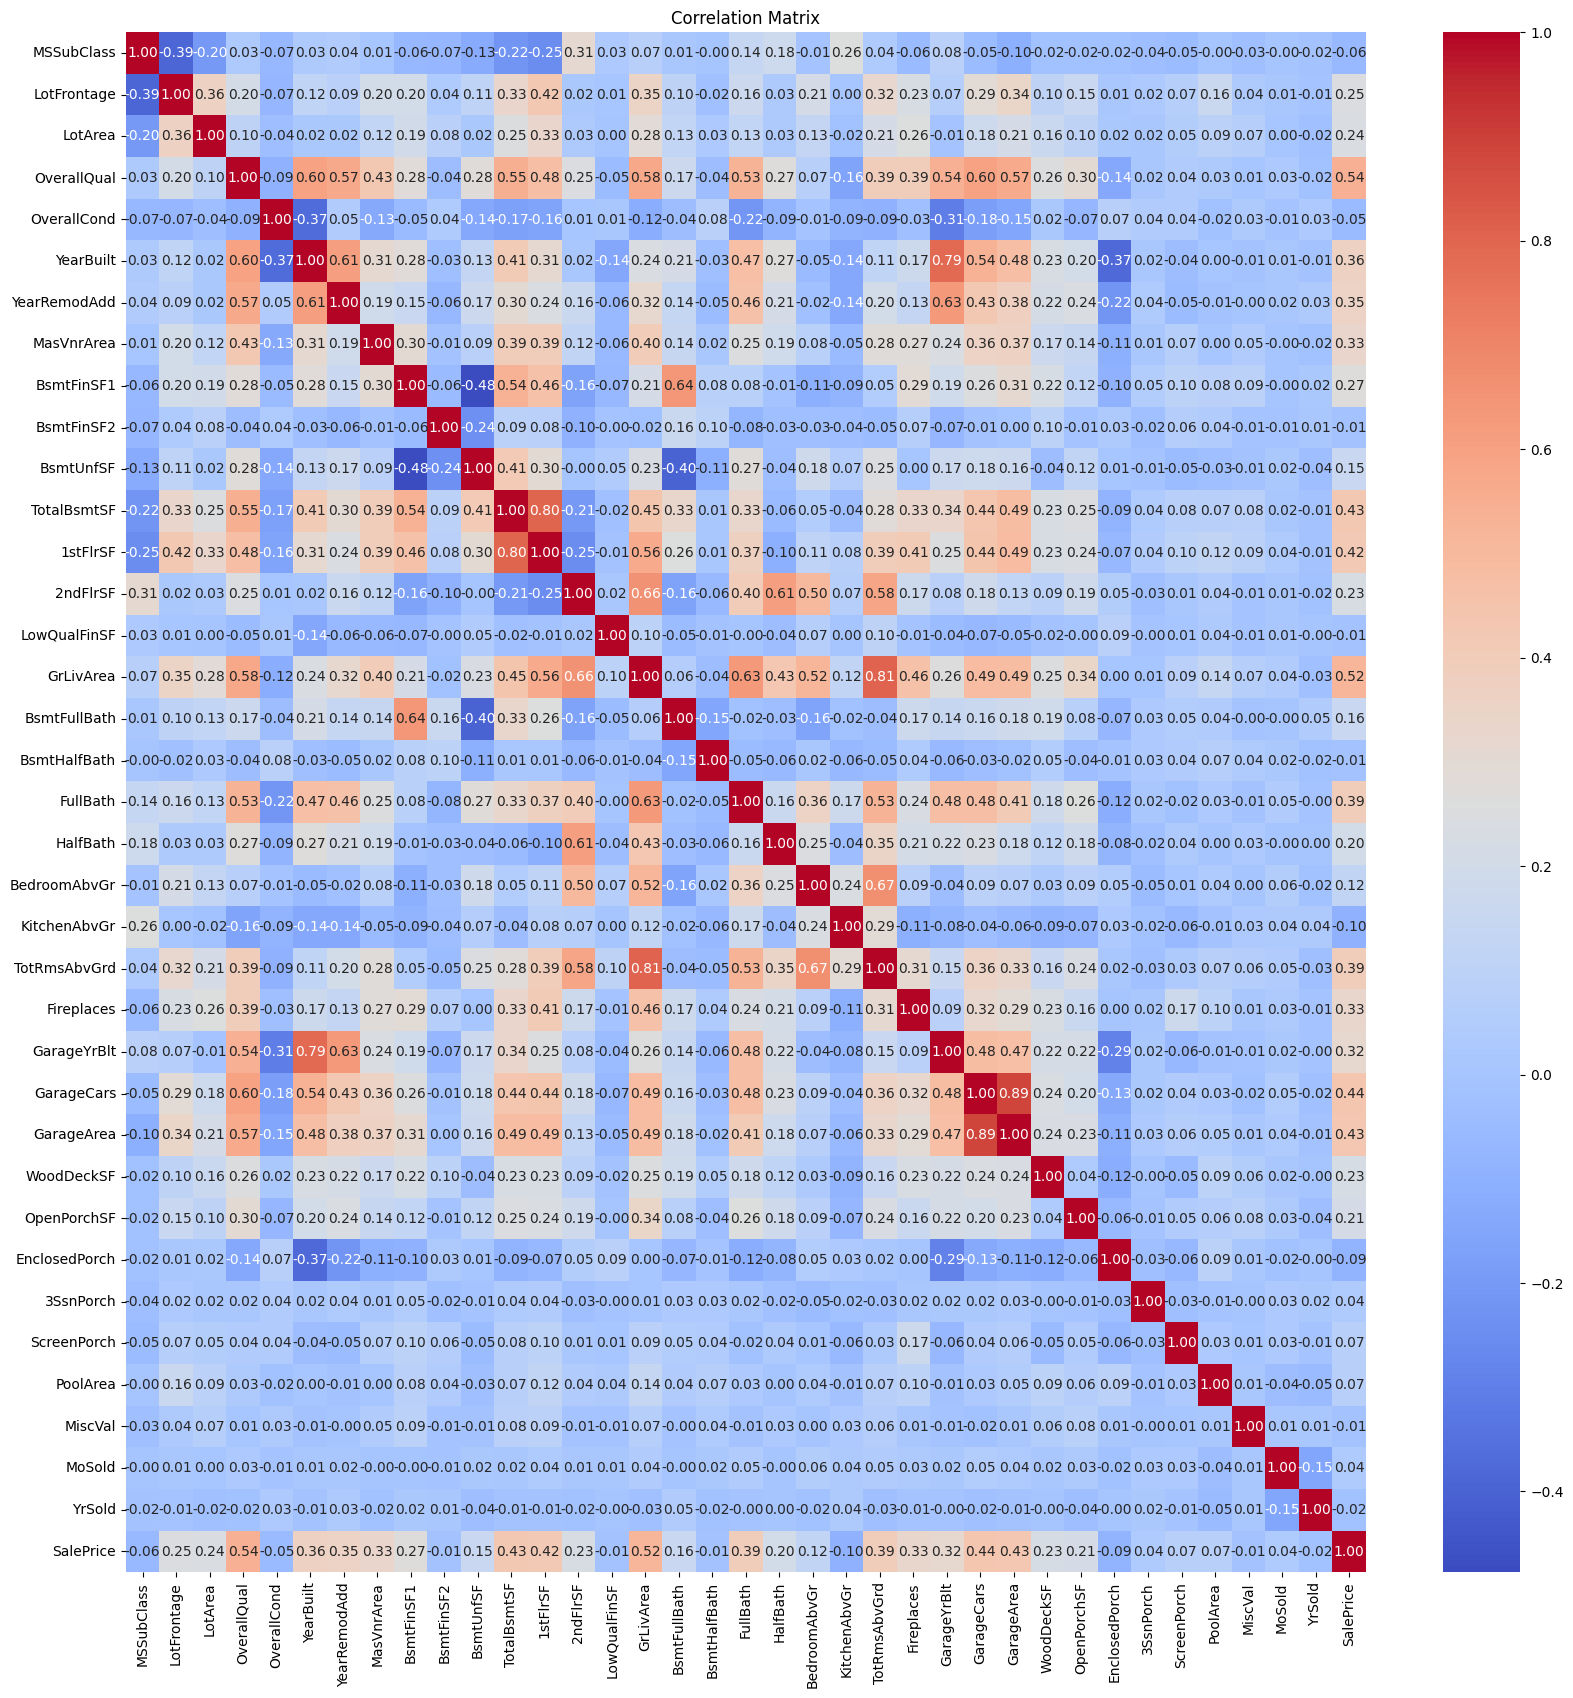

In [14]:
# Correlation matrix heatmap
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


As we suspected, features like year built and garage year built are highly correlated, as well as things like garagecars and garagearea. Also interesting to note that "overalqal" seems to be highly correlated with sales price, definitely a feature we are interested in.

Let's try examine some categorical features:

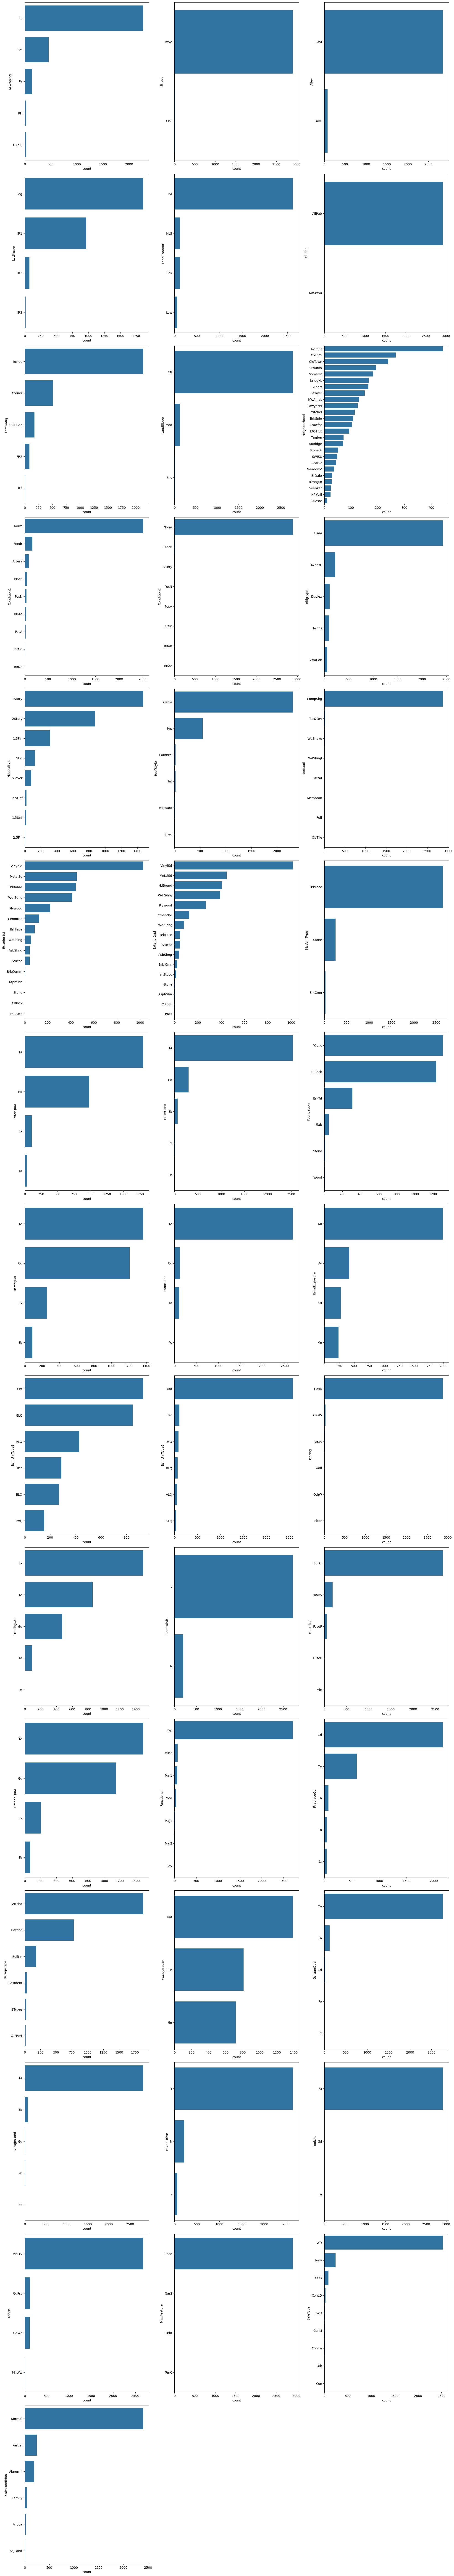

In [ ]:
# Bar charts for categorical features
# for feature in categorical_features:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
#     plt.title(f'Count of {feature}')
#     plt.show()
plt.figure(figsize=(20, 150))
for i, feature in enumerate(categorical_features):
    plt.subplot(20,3 , i+1)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.tight_layout()

Lets see the impact on sales price:

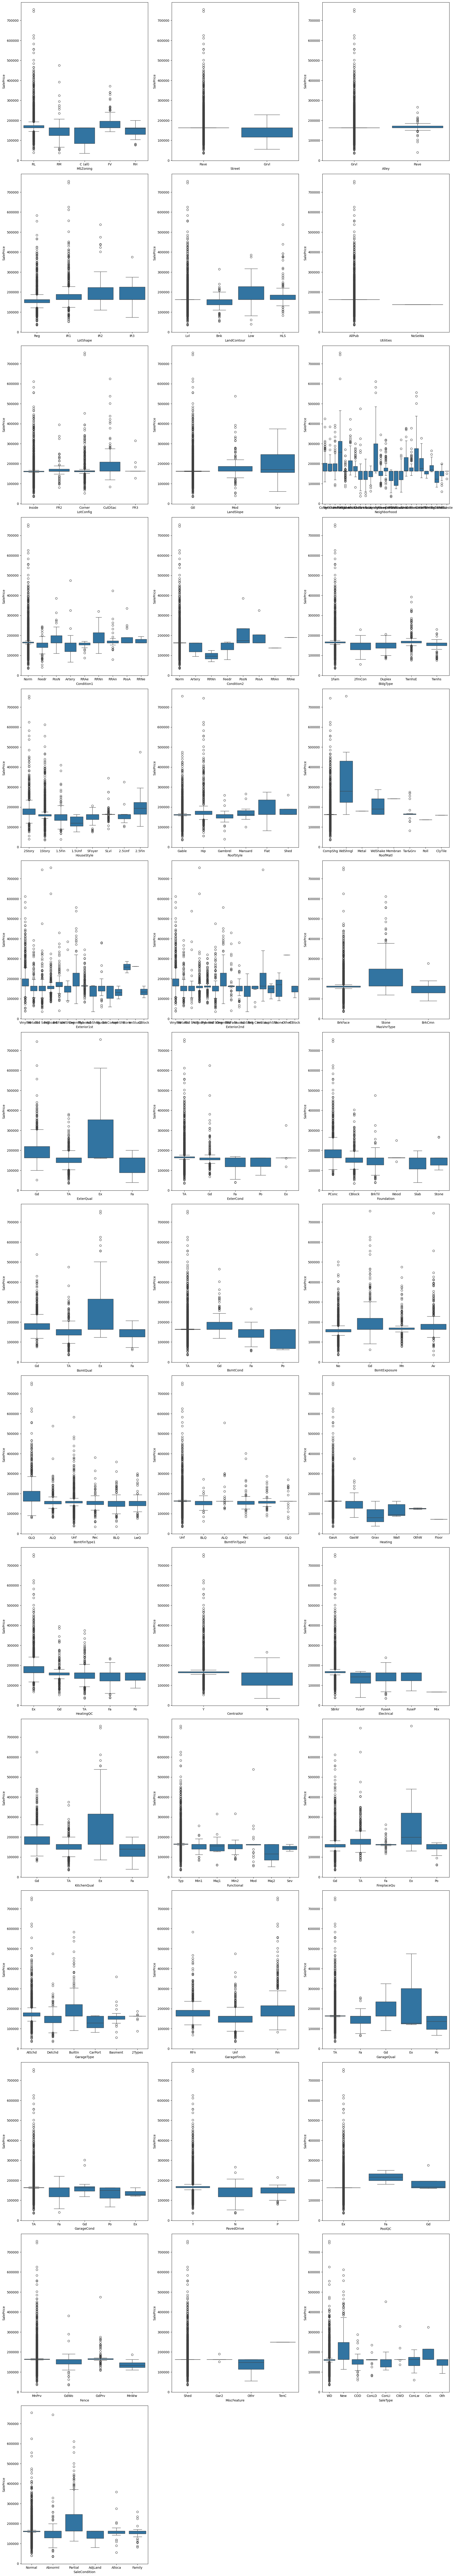

In [ ]:
# Box plots of SalePrice against categorical features
# for feature in categorical_features:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=feature, y='SalePrice', data=df)
#     plt.title(f'SalePrice vs {feature}')
#     plt.xticks(rotation=45)
#     plt.show()
plt.figure(figsize=(20, 150))
for i, feature in enumerate(categorical_features):
    plt.subplot(20,3 , i+1)
    sns.boxplot(x=feature, y='SalePrice', data=df)
    plt.tight_layout()

We see that a lot of featurs do have an impact on sales price, some are even ordinal values which we should encode later to get a better idea of how the correlation looks with sales price.

## Dealing with Outliers
We will use some basic IQR methods to prevent outliers from skewing our dataset, although our set is not that large so we need to be careful about how much data we remove.

In [ ]:
# Function to detect outliers
def detect_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]
    return outliers

# Detect outliers in numerical features
outliers_indices = []
for feature in numerical_features:
    outliers = detect_outliers(feature)
    outliers_indices.extend(outliers.index)

# Remove duplicates
outliers_indices = list(set(outliers_indices))


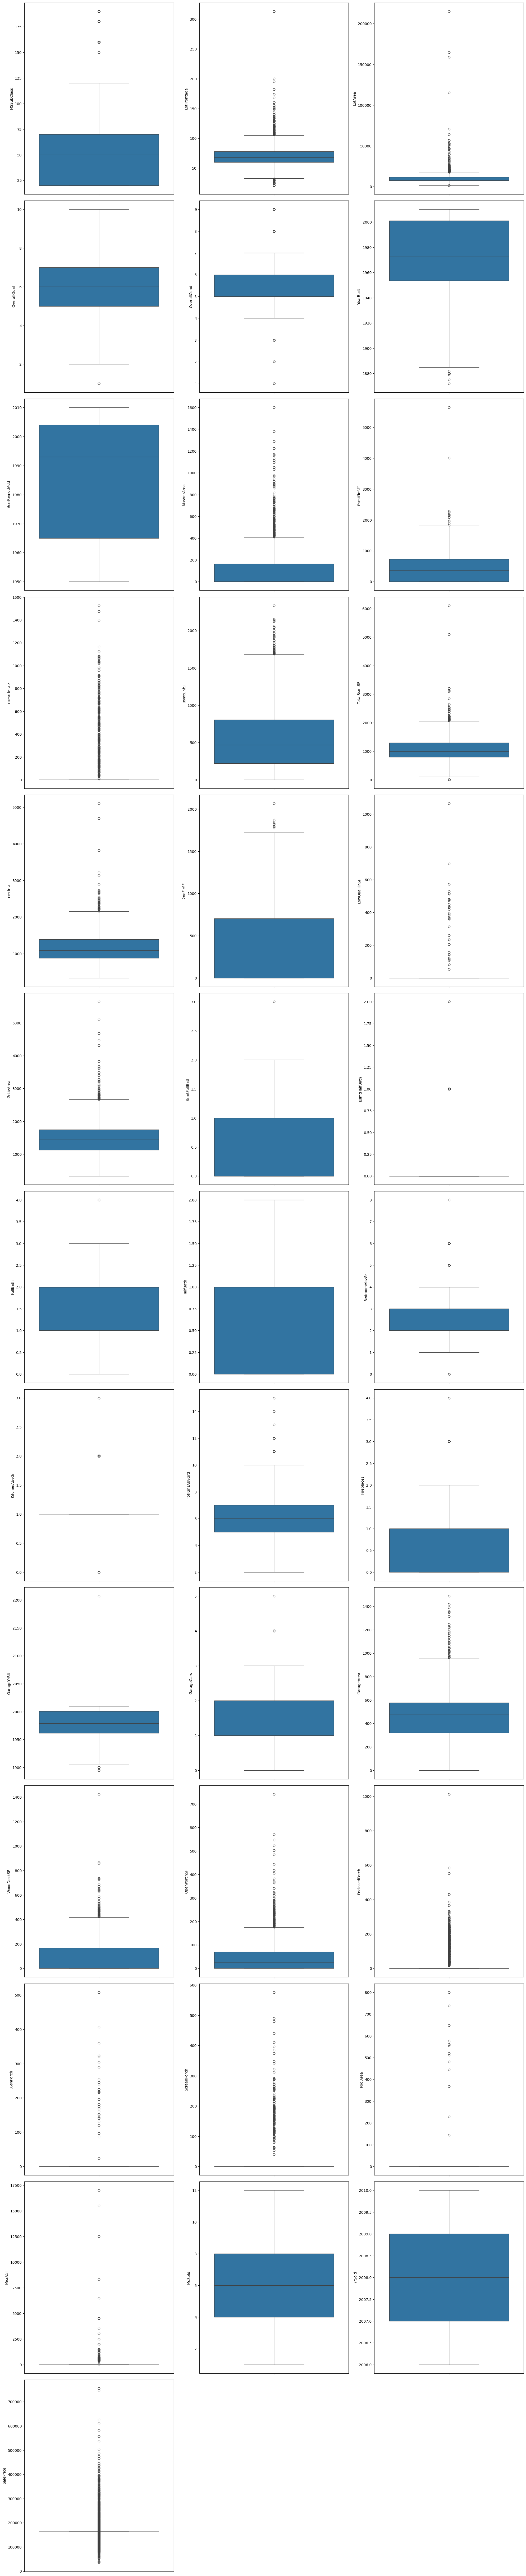

In [ ]:
# # Box plots highlighting outliers
# for feature in numerical_features:
#     plt.figure(figsize=(8, 6))

#     plt.title(f'Boxplot of {feature}')
#     # plt.show()
plt.figure(figsize=(20, 150))
for i, feature in enumerate(numerical_features):
    plt.subplot(20,3 , i+1)
    sns.boxplot(y=feature, data=df)
    plt.tight_layout()


Given the large variance, it looks like the IQR method is going to remove too much of dataset, particularly looking at things like land square-footage. I am going to leave them in and see how the model performs, we can come back to this later.

In [ ]:
qual_dict = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['ExterQual'] = df['ExterQual'].map(qual_dict)
# One-hot encoding for nominal variables
categorical_features.remove('ExterQual') #Careful about rerunning this step
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)



We have applied some basic transformations. Categorical variables were encoded appropriately: ordinal features using label encoding based on their intrinsic order and nominal features using one-hot encoding. We may need to go through some more ordinal features as we have taken most to be nominal.

In [ ]:

from sklearn.model_selection import train_test_split

# Features and target variable
print(df.columns)
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
numerical_features.remove('SalePrice')
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=243)


In [ ]:
# Now the data is ready for modeling
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_valid.shape)


Training features shape: (2335, 242)
Validation features shape: (584, 242)


In [ ]:
X_train.to_csv("X_train.csv")
X_valid.to_csv("X_valid.csv")
y_train.to_csv("y_train.csv")
y_valid .to_csv("y_valid.csv")